In [70]:

import os
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:

silver_path = os.path.join(os.curdir, "Data_Lake", "Silver")
silver_file_name = "erp_silver.parquet"


silver_file_path = os.path.join(
    silver_path, silver_file_name
)


In [3]:
gold_df = pd.read_parquet(silver_file_path)
gold_df.head()

,RAZONSOCIAL,NOMBRECOMERCIAL,DIRECCION,SITIOWEB,EMAIL,TELEFONO,PRODUCTOS,EMPLEOTOTAL,RANGOFACTURACION,IMPORTA,EXPORTA,FECHAACTUALIZACION,_BronzeTimestamp
0,"8Y5 DIGITAL STUDIO, S.L.",No especificado,"CASIMIRO VELASCO 20, 2O IZQUIERDA, GIJON, ASTU...",https://8y5.studio/,hello@8y5.studio,No disponible,Diseño digital especializado en productos digi...,2,Entre 0 y 150.000,False,False,31/07/2025,2025-11-07 14:38:14.396816
1,"A CONTRAVIENTO, C.B.",A CONTRAVIENTO COMUNICACION,"C/ MIGUEL HERNANDEZ, 8 B, 1º E 33420 SIERO AST...",No disponible,acontravientocomunicacion@gmail.com,98.418.97.39,"Diseño gráfico, publicidad, imagen corporativa...",<NA>,n.d.,False,False,31/07/2025,2025-11-07 14:38:14.396816
2,"A.M.H. BERAN, S.L.",BERAN,"C/ MARCO POLO, 54 33211 GIJON ASTURIAS",http://www.beran.es,amhberan@beran.es,98.516.73.23,Afilado y venta de herramientas de corte. Vent...,<NA>,n.d.,False,False,31/07/2025,2025-11-07 14:38:14.396816
3,"ABED AL RAHMAN AL-MA'AYTEH LOPEZ, E.I.",HIPOPOTESIS: AGENCIA DE INVESTIGACION SOCIAL,"AVDA. ARGENTINA 132, DESP.231 33213 GIJON ASTU...",https://hipopotesis.com/,contacto@hipopotesis.com,622626736,Investigación etnográfica. Transformación Cult...,4,Entre 0 y 150.000,True,True,01/10/2025,2025-11-07 14:38:14.396816
4,"ABEL FERNANDEZ MARTINEZ, E.I.",ASESORIA ARSAM,"URB. LA VEGA, 4 33860 SALAS ASTURIAS",https://www.abelfernandezmartinez.es/,abel.fernandez@arsam-salas.com,98.583.07.63,"Asesoría laboral, contable y fiscal.",3,n.d.,False,False,31/07/2025,2025-11-07 14:38:14.396816


In [4]:
gold_df["SITIOWEB"].value_counts()

SITIOWEB
No disponible                   155
http://www.arcichamotas.com       3
http://www.grupocobra.com         2
https://gamrentals.com/           2
http://www.cafento.com            2
                               ... 
http://videoimagen.info           1
http://www.vidrioslanueva.es      1
http://www.grupovd.com            1
http://www.villegas.cl/           1
http://www.vinodecangas.com       1
Name: count, Length: 1083, dtype: int64

In [92]:
#AÑADIR COLUMNA COMPROBACION WEB
# ¿por que reconoce la columna si el nombre de columna no es el mismo? OK
def comprobar_si_tiene_web(sitio_web: str):
    if sitio_web == "No disponible":
        return "No"
    else:
        return "Si"

In [93]:
#df[] = esto vale para modificar la columna o añadir una
#El .apply sirve para nose que las funcoines en python 
gold_df["TIENE_WEB"] = gold_df['SITIOWEB'].apply(comprobar_si_tiene_web)

In [94]:
#EMPRESAS CON/SIN WEB
gold_df.head()

,RAZONSOCIAL,NOMBRECOMERCIAL,DIRECCION,SITIOWEB,EMAIL,TELEFONO,PRODUCTOS,EMPLEOTOTAL,RANGOFACTURACION,IMPORTA,EXPORTA,FECHAACTUALIZACION,_BronzeTimestamp,TIENE_WEB,FACTURACION,TIENE_EMAIL,TIENE_TLF
0,"8Y5 DIGITAL STUDIO, S.L.",No especificado,"CASIMIRO VELASCO 20, 2O IZQUIERDA, GIJON, ASTU...",https://8y5.studio/,hello@8y5.studio,No disponible,Diseño digital especializado en productos digi...,2,Entre 0 y 150.000,False,False,31/07/2025,2025-11-07 14:38:14.396816,Si,150000,True,False
1,"A CONTRAVIENTO, C.B.",A CONTRAVIENTO COMUNICACION,"C/ MIGUEL HERNANDEZ, 8 B, 1º E 33420 SIERO AST...",No disponible,acontravientocomunicacion@gmail.com,98.418.97.39,"Diseño gráfico, publicidad, imagen corporativa...",<NA>,n.d.,False,False,31/07/2025,2025-11-07 14:38:14.396816,No,0,True,True
2,"A.M.H. BERAN, S.L.",BERAN,"C/ MARCO POLO, 54 33211 GIJON ASTURIAS",http://www.beran.es,amhberan@beran.es,98.516.73.23,Afilado y venta de herramientas de corte. Vent...,<NA>,n.d.,False,False,31/07/2025,2025-11-07 14:38:14.396816,Si,0,True,True
3,"ABED AL RAHMAN AL-MA'AYTEH LOPEZ, E.I.",HIPOPOTESIS: AGENCIA DE INVESTIGACION SOCIAL,"AVDA. ARGENTINA 132, DESP.231 33213 GIJON ASTU...",https://hipopotesis.com/,contacto@hipopotesis.com,622626736,Investigación etnográfica. Transformación Cult...,4,Entre 0 y 150.000,True,True,01/10/2025,2025-11-07 14:38:14.396816,Si,150000,True,True
4,"ABEL FERNANDEZ MARTINEZ, E.I.",ASESORIA ARSAM,"URB. LA VEGA, 4 33860 SALAS ASTURIAS",https://www.abelfernandezmartinez.es/,abel.fernandez@arsam-salas.com,98.583.07.63,"Asesoría laboral, contable y fiscal.",3,n.d.,False,False,31/07/2025,2025-11-07 14:38:14.396816,Si,0,True,True


In [9]:
# ESTO NADA : 
# sin_web = gold_df[gold_df["TIENE_WEB"] == False]
# print(sin_web["SITIOWEB"].unique())
#pd.set_option('display.max_rows', None)
#sin_web["SITIOWEB"].value_counts
#hay 4 que si que pueden tener web (inicio:www./WWW.)




In [ ]:

#CONVERTIMOS RANGOFACTURACION A UN DATO ESPECIFICO
#LA FUNCION TIENE VARIABLES QUE NO PERTENECEN AL DF O ALGO DETERMINADO
#EL :STR, QUE TIPO DE DATO VA A LEER / Y EL -> INT, ME DICE QUE ME TIENE QUE DEVOLVER UN ENTERO (ESO NO IMPLICA LA CONVERSION)
#EL INT(), ME CONVIERTE LO DEL PARENTESIS A ENTERO
#EL .SPLIT ME SEPARA A LA DERECHA Y A LA IZQUIERDA DEL INDICADOR QUE TENGA ("Y"), AL ESCRIBIR [1] ME VA A DEVOLVER LA PARTE DERECHA /// EL REPLACE() LO AÑADIMOS PORQUE DABA ERROR AL LEER 150.000.000 (POR EL PUNTO) Y LE INDICAMOS QUE SUSTITUYA EL PUNTO POR NADA
def extraer_facturacion(rango_facturacion: str)->int:
    if "y" in rango_facturacion:
        facturacion = int(rango_facturacion.split("y")[1].strip().replace(".",""))
        return facturacion
    if "Más" in rango_facturacion:
        return 500_000_000
    elif rango_facturacion == "n.d.":
        return 0
    else:
        return 0

In [13]:
gold_df['FACTURACION'] = gold_df['RANGOFACTURACION'].apply(extraer_facturacion)

In [18]:
gold_df['FACTURACION'].value_counts()



FACTURACION
0            1210
150000         23
300000          8
2100000         2
450000          2
30000000        2
1200000         1
3000000         1
500000000       1
Name: count, dtype: int64

In [98]:
#AÑADIR COLUMNA COMPROBACION EMAIL 

def comprobar_si_tiene_email(email: str):
    if email == "No disponible":
        return "No"
    else:
        return "Si"
    
gold_df["TIENE_EMAIL"] = gold_df['EMAIL'].apply(comprobar_si_tiene_email)

In [99]:
gold_df.head()

,RAZONSOCIAL,NOMBRECOMERCIAL,DIRECCION,SITIOWEB,EMAIL,TELEFONO,PRODUCTOS,EMPLEOTOTAL,RANGOFACTURACION,IMPORTA,EXPORTA,FECHAACTUALIZACION,_BronzeTimestamp,TIENE_WEB,FACTURACION,TIENE_EMAIL,TIENE_TLF
0,"8Y5 DIGITAL STUDIO, S.L.",No especificado,"CASIMIRO VELASCO 20, 2O IZQUIERDA, GIJON, ASTU...",https://8y5.studio/,hello@8y5.studio,No disponible,Diseño digital especializado en productos digi...,2,Entre 0 y 150.000,False,False,31/07/2025,2025-11-07 14:38:14.396816,Si,150000,Si,False
1,"A CONTRAVIENTO, C.B.",A CONTRAVIENTO COMUNICACION,"C/ MIGUEL HERNANDEZ, 8 B, 1º E 33420 SIERO AST...",No disponible,acontravientocomunicacion@gmail.com,98.418.97.39,"Diseño gráfico, publicidad, imagen corporativa...",<NA>,n.d.,False,False,31/07/2025,2025-11-07 14:38:14.396816,No,0,Si,True
2,"A.M.H. BERAN, S.L.",BERAN,"C/ MARCO POLO, 54 33211 GIJON ASTURIAS",http://www.beran.es,amhberan@beran.es,98.516.73.23,Afilado y venta de herramientas de corte. Vent...,<NA>,n.d.,False,False,31/07/2025,2025-11-07 14:38:14.396816,Si,0,Si,True
3,"ABED AL RAHMAN AL-MA'AYTEH LOPEZ, E.I.",HIPOPOTESIS: AGENCIA DE INVESTIGACION SOCIAL,"AVDA. ARGENTINA 132, DESP.231 33213 GIJON ASTU...",https://hipopotesis.com/,contacto@hipopotesis.com,622626736,Investigación etnográfica. Transformación Cult...,4,Entre 0 y 150.000,True,True,01/10/2025,2025-11-07 14:38:14.396816,Si,150000,Si,True
4,"ABEL FERNANDEZ MARTINEZ, E.I.",ASESORIA ARSAM,"URB. LA VEGA, 4 33860 SALAS ASTURIAS",https://www.abelfernandezmartinez.es/,abel.fernandez@arsam-salas.com,98.583.07.63,"Asesoría laboral, contable y fiscal.",3,n.d.,False,False,31/07/2025,2025-11-07 14:38:14.396816,Si,0,Si,True


In [100]:
#AÑADIR COLUMNA COMPROBACION TLF 

def comprobar_si_tiene_tlf(tlf: str):
    if tlf == "No disponible":
        return "No"
    else:
        return "Si"
    
gold_df["TIENE_TLF"] = gold_df['TELEFONO'].apply(comprobar_si_tiene_tlf)

In [127]:
gold_df.head()

,RAZONSOCIAL,NOMBRECOMERCIAL,DIRECCION,SITIOWEB,EMAIL,TELEFONO,PRODUCTOS,EMPLEOTOTAL,RANGOFACTURACION,IMPORTA,EXPORTA,FECHAACTUALIZACION,_BronzeTimestamp,TIENE_WEB,FACTURACION,TIENE_EMAIL,TIENE_TLF
0,"8Y5 DIGITAL STUDIO, S.L.",No especificado,"CASIMIRO VELASCO 20, 2O IZQUIERDA, GIJON, ASTU...",https://8y5.studio/,hello@8y5.studio,No disponible,Diseño digital especializado en productos digi...,2,Entre 0 y 150.000,False,False,31/07/2025,2025-11-07 14:38:14.396816,Si,150000,Si,No
1,"A CONTRAVIENTO, C.B.",A CONTRAVIENTO COMUNICACION,"C/ MIGUEL HERNANDEZ, 8 B, 1º E 33420 SIERO AST...",No disponible,acontravientocomunicacion@gmail.com,98.418.97.39,"Diseño gráfico, publicidad, imagen corporativa...",<NA>,n.d.,False,False,31/07/2025,2025-11-07 14:38:14.396816,No,0,Si,Si
2,"A.M.H. BERAN, S.L.",BERAN,"C/ MARCO POLO, 54 33211 GIJON ASTURIAS",http://www.beran.es,amhberan@beran.es,98.516.73.23,Afilado y venta de herramientas de corte. Vent...,<NA>,n.d.,False,False,31/07/2025,2025-11-07 14:38:14.396816,Si,0,Si,Si
3,"ABED AL RAHMAN AL-MA'AYTEH LOPEZ, E.I.",HIPOPOTESIS: AGENCIA DE INVESTIGACION SOCIAL,"AVDA. ARGENTINA 132, DESP.231 33213 GIJON ASTU...",https://hipopotesis.com/,contacto@hipopotesis.com,622626736,Investigación etnográfica. Transformación Cult...,4,Entre 0 y 150.000,True,True,01/10/2025,2025-11-07 14:38:14.396816,Si,150000,Si,Si
4,"ABEL FERNANDEZ MARTINEZ, E.I.",ASESORIA ARSAM,"URB. LA VEGA, 4 33860 SALAS ASTURIAS",https://www.abelfernandezmartinez.es/,abel.fernandez@arsam-salas.com,98.583.07.63,"Asesoría laboral, contable y fiscal.",3,n.d.,False,False,31/07/2025,2025-11-07 14:38:14.396816,Si,0,Si,Si


In [ ]:

# CORRELACION DE 2 VARIABLES CATEGORICAS
tabla_importa_exporta = pd.crosstab(gold_df['IMPORTA'],gold_df['EXPORTA'])

chi2, p_value, dof, expected = chi2_contingency(tabla_importa_exporta)

print(chi2, p_value, dof, expected)

# INTERPRETACION: CHI2 (valor muy grande= fuerte desviacion de la independencia)
# P_VALUE (p<0,05 = hay asociacion y fuerte)
# IMPORTA Y EXPORTA ESTAN ESTADISTICAMENTE ASOCIADAS

333.99970728656234 1.2931872388547062e-74 1 [[606.372 290.628]
 [238.628 114.372]]


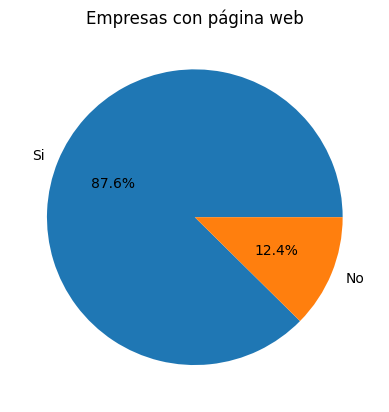

In [ ]:

#GRAFICA 1 (WEB)
# Contamos los si/no de la columna en la variable creada, creamos la nueva figura, creamos la grafica circular (variable, leyenda si/no, porcentaje), ponemos titulo y mostramos
conteo = gold_df['TIENE_WEB'].value_counts()

plt.figure()
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%')
plt.title('Empresas con página web')
plt.show()





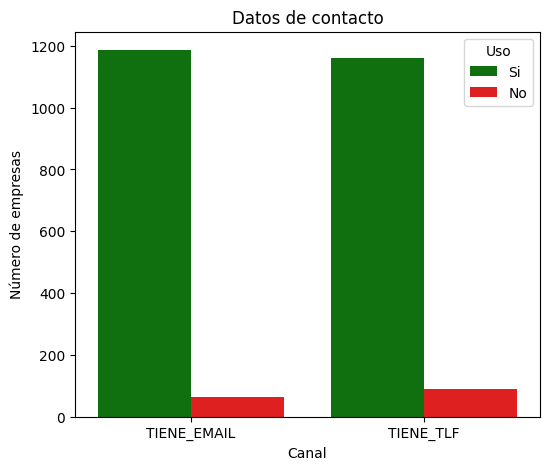

In [124]:
# GRAFICA 2 (DATOS CONTACTO): 1. variable para agrupar variables 1.1 usamos pd.melt para ordenar columnas en funcion de canal (donde se representa nombres de columnas) y usa (para cada columna representa valor si y no)
# 2. preparamos figura, creamos grafico barras (el df nuevo, eje x, el hue='usa' separa barras por valor si/no, colores si/no)

df_email_tlf = pd.melt(
    gold_df,
    value_vars=['TIENE_EMAIL','TIENE_TLF'],
    var_name='Canal',
    value_name='Uso'
)

plt.figure(figsize=(6,5))
sns.countplot(data=df_email_tlf, x='Canal', hue='Uso', palette=['green','red'])
plt.title('Datos de contacto')
plt.ylabel('Número de empresas')
plt.show()


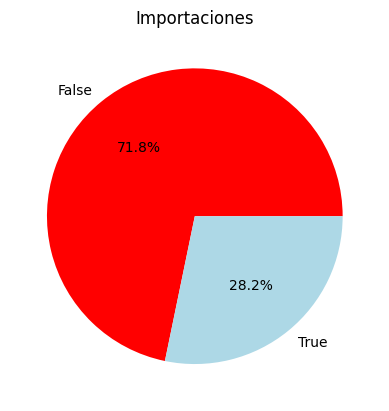

In [144]:
#GRAFICA 3 (IMPORTACION)
# Contamos los true/false de la columna en la variable creada, creamos la nueva figura, creamos la grafica circular (variable, leyenda si/no, porcentaje), ponemos titulo y mostramos
numero_empresas_importa = gold_df['IMPORTA'].value_counts()
colors= ['red', 'lightblue']
plt.figure()
plt.pie(numero_empresas_importa, labels=numero_empresas_importa.index, autopct='%1.1f%%', colors = colors)
plt.title('Importaciones')
plt.show()

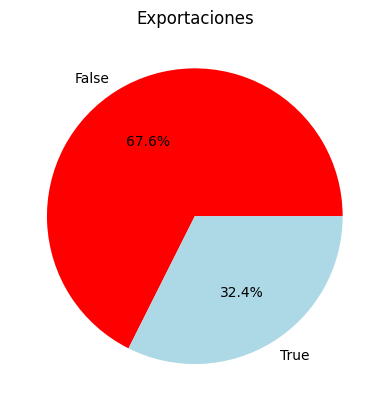

In [147]:
#GRAFICA 4 (EXPORTACIONES)
numero_empresas_exporta = gold_df['EXPORTA'].value_counts()
colors= ['red', 'lightblue']
plt.figure()
plt.pie(numero_empresas_exporta, labels=numero_empresas_exporta.index, autopct='%1.1f%%', colors = colors)
plt.title('Exportaciones')
plt.show()